# Heart Disease Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

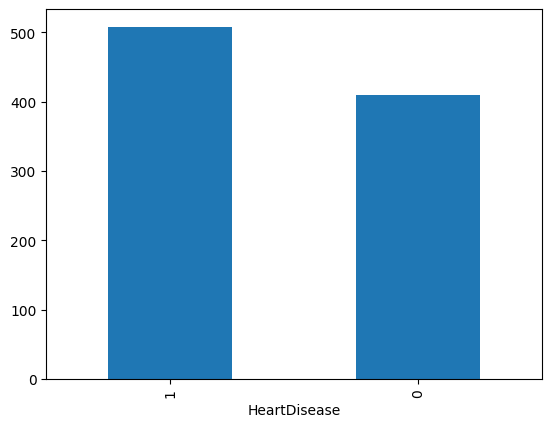

In [10]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

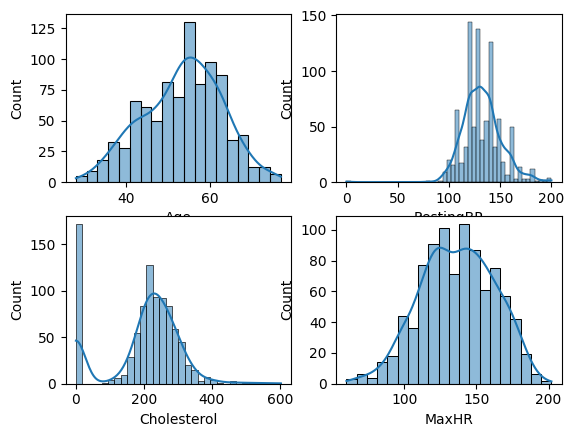

In [12]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

In [13]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [14]:
mcholestrol = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

df['Cholesterol'] = df['Cholesterol'].apply(lambda x : round(mcholestrol,2) if x == 0 else x)

In [15]:
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
223.00     10
220.00     10
230.00      9
         ... 
392.00      1
316.00      1
153.00      1
466.00      1
131.00      1
Name: count, Length: 222, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

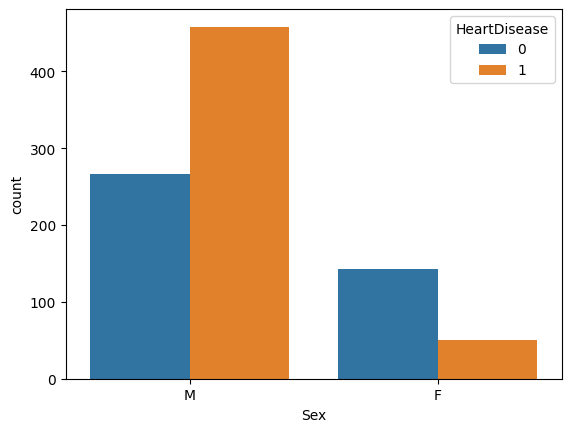

In [16]:
sns.countplot(x= df['Sex'],  hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

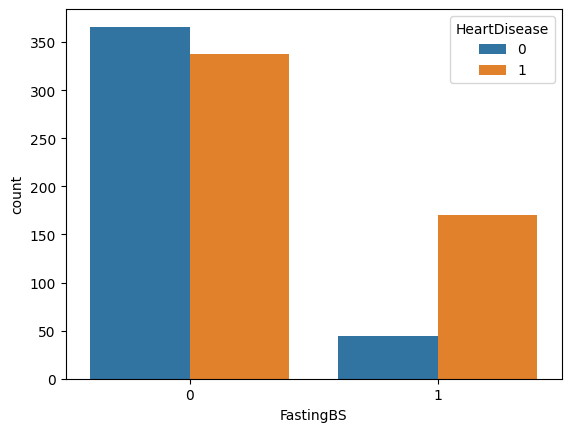

In [17]:
sns.countplot(x= df['FastingBS'],  hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

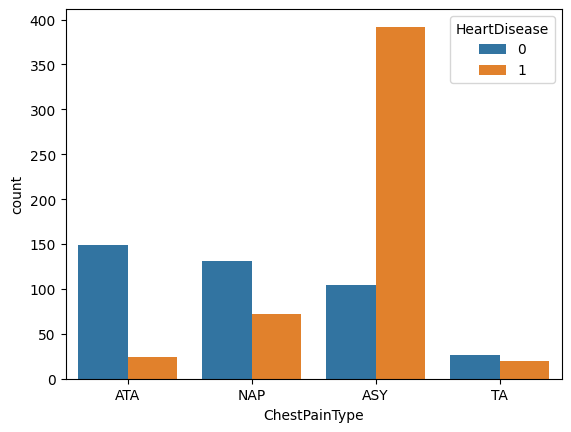

In [18]:
sns.countplot(x = df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

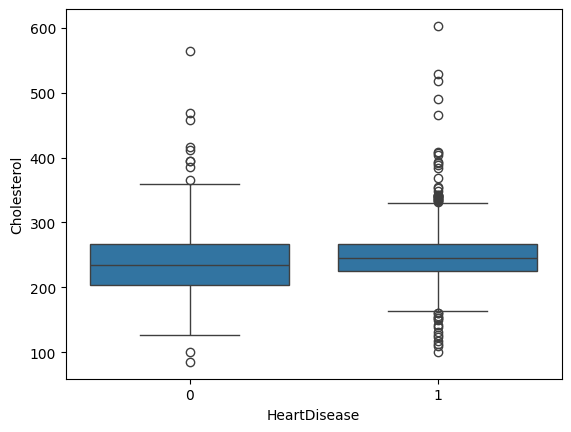

In [19]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

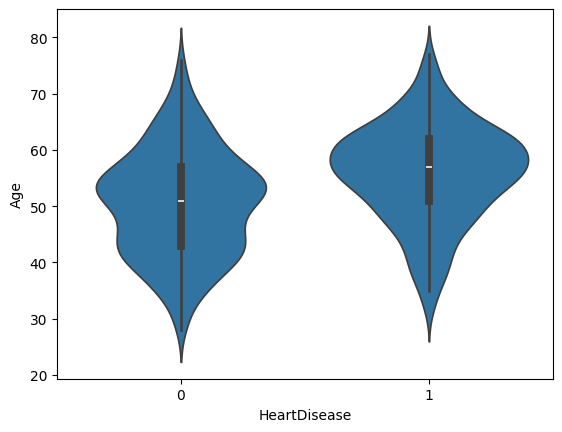

In [20]:
sns.violinplot(x=df['HeartDisease'], y=df['Age'])

<Axes: >

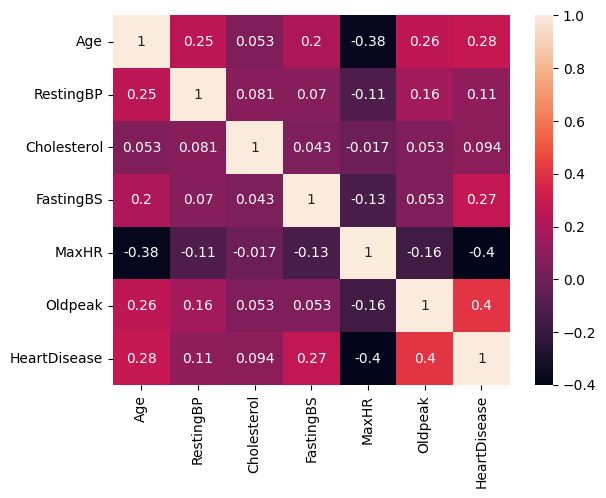

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Data Preprocessing and Cleaning

In [22]:
df_encode = pd.get_dummies(df,drop_first=True)

In [23]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [24]:
df_encode = df_encode.astype(int)

In [25]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])

In [27]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [28]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [30]:
x = df_encode.drop(columns=['HeartDisease'])

y = df_encode['HeartDisease']

In [31]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.834754,0,1.382928,-0.727592,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-1.210675,0,0.754157,0.282891,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.722161,0,-1.525138,-0.727592,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,-0.572651,0,-1.132156,0.282891,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.929194,0,-0.581981,-0.727592,1,0,1,0,1,0,0,0,1


In [32]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int32

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
scaler = StandardScaler()

In [35]:
x_train_scaled = scaler.fit_transform(x_train)   
x_test_scaled = scaler.transform(x_test)         


In [36]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision tree":DecisionTreeClassifier(),
    "SVM": SVC()

}

In [37]:
result = []

In [38]:
for name, model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append(
        {
            'model':name,
            'Accuracy':round(acc,4),
            'f1_score':round(f1,4)
        }
    )

In [39]:
result

[{'model': 'LogisticRegression', 'Accuracy': 0.8696, 'f1_score': 0.8846},
 {'model': 'KNN', 'Accuracy': 0.8641, 'f1_score': 0.8804},
 {'model': 'Naive Bayes', 'Accuracy': 0.8478, 'f1_score': 0.8614},
 {'model': 'Decision tree', 'Accuracy': 0.7935, 'f1_score': 0.8081},
 {'model': 'SVM', 'Accuracy': 0.8424, 'f1_score': 0.8626}]

In [40]:
import joblib
joblib.dump(models['KNN'], 'KNN_heart.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(x.columns.tolist(), 'columns.pkl')

['columns.pkl']